In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
data_train_1 = pd.read_csv("data set\spliting data\\train part_1.csv")
data_train_2 = pd.read_csv("data set\\spliting data\\train part_2.csv")
data_train_3 = pd.read_csv("data set\\spliting data\\train part_3.csv")
data_train_4 = pd.read_csv("data set\\spliting data\\train part_4.csv")
data_train_5 = pd.read_csv("data set\\spliting data\\train part_5.csv")





data_train=pd.concat([data_train_1, data_train_2,data_train_3,data_train_4,data_train_5], axis=0)






data_test= pd.read_csv("data set\\spliting data\\all_test.csv")
data_val= pd.read_csv("data set\\spliting data\\all_val.csv")
data_train = data_train.sample(frac=1).reset_index(drop=True)

data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [3]:
# label_encoder = LabelEncoder()
# data_train['label'] = label_encoder.fit_transform(data_train['label'])
# data_test['label']=label_encoder.transform(data_test['label'])
# data_val['label']=label_encoder.transform(data_val['label'])





In [4]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,fake,-307.859467,32.978336,-20.356115,-12.334535,-36.161186,-33.590122,-23.310148,-11.912947,-15.936907,...,-7.528393,-7.296203,-6.992928,-3.701698,-2.597452,1.291890,1.372199,4.907427,4.572099,5.371532
1,fake,-308.196503,19.887827,-0.383669,8.633661,-39.277096,-36.774342,-30.005888,-12.911517,-16.147305,...,-9.571132,-8.152810,-7.521767,-3.511980,-2.135336,1.535293,2.110273,6.219537,3.036965,6.054299
2,fake,-357.611725,39.524612,-8.327751,-19.815559,-22.169096,-11.940414,-21.097921,3.645494,-13.677443,...,-1.673670,-1.721293,-5.724184,-6.900796,-11.137676,-12.060456,-17.730825,-17.045111,-19.351654,-13.718862
3,fake,-314.427399,42.577003,-20.388903,-8.288397,-36.409332,-39.356548,-22.793846,-14.834097,-11.444859,...,-6.624330,-6.326911,-5.985142,-3.583003,-2.296246,2.027973,2.086052,5.870180,3.984034,5.142844
4,fake,-313.197449,39.195866,-26.054617,-3.052262,-32.852448,-34.968330,-25.817474,-11.071267,-14.912733,...,-9.737156,-8.293412,-7.238901,-4.215489,-2.458861,0.747861,1.792160,4.398365,4.192421,5.125175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117888,fake,-295.171783,60.641434,-32.858753,-15.974833,-41.608631,-37.285660,-10.383304,-17.236092,-17.586704,...,-7.620730,-6.886168,-6.177934,-2.537408,-1.719126,1.726989,2.433707,5.609871,5.259643,5.272573
117889,fake,-310.519440,60.325569,-36.459282,-18.120646,-34.505371,-37.894493,-13.478616,-13.316074,-14.215761,...,-9.094782,-8.036377,-7.092644,-3.848783,-2.530817,0.398484,1.400265,4.711998,3.385035,3.869929
117890,fake,-305.006012,19.106636,15.111568,-6.834978,-31.205559,-33.943275,-41.812344,0.399326,-8.483434,...,-9.188018,-6.718041,-7.749186,-3.169236,-3.214850,0.933834,1.146393,5.557870,4.389226,5.236593
117891,fake,-295.564117,35.538837,-15.187084,-4.006739,-33.118744,-34.326992,-21.571457,-16.799807,-9.421033,...,-5.584540,-5.435066,-5.117115,-3.013400,-1.911517,1.173221,1.632889,5.178421,3.647707,5.313014


In [5]:
count = data_train['label'].value_counts()
print(count)


fake    107413
real     10480
Name: label, dtype: int64


In [6]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels
y_train = pd.get_dummies(y_train)

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels
y_val = pd.get_dummies(y_val)



X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels
y_test = pd.get_dummies(y_test)


In [7]:
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1843/1843 [==============================] - 14s 7ms/step - loss: 0.2738 - accuracy: 0.9108 - val_loss: 0.2571 - val_accuracy: 0.9112
Epoch 2/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.2253 - accuracy: 0.9200 - val_loss: 0.1784 - val_accuracy: 0.9325
Epoch 3/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1599 - accuracy: 0.9407 - val_loss: 0.1522 - val_accuracy: 0.9425
Epoch 4/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1346 - accuracy: 0.9494 - val_loss: 0.1202 - val_accuracy: 0.9527
Epoch 5/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1198 - accuracy: 0.9546 - val_loss: 0.1283 - val_accuracy: 0.9503
Epoch 6/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1094 - accuracy: 0.9591 - val_loss: 0.1236 - val_accuracy: 0.9540
Epoch 7/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1007 - accuracy: 0.9621 - val_loss: 0.1036 -

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 2s - loss: 0.1582 - accuracy: 0.9681 - 2s/epoch - 3ms/step
Test Accuracy: 96.81%


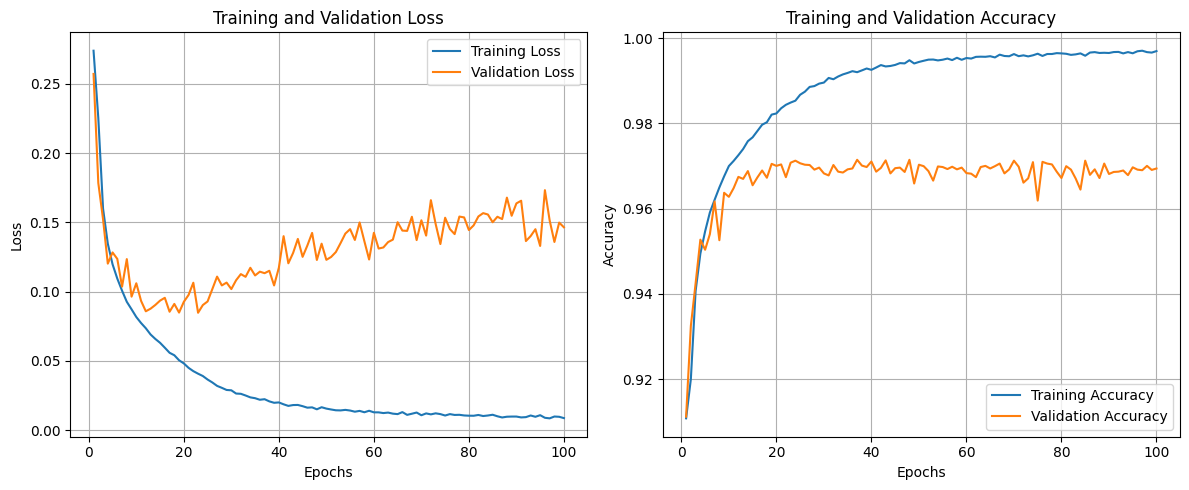

In [9]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


461/461 [==============================] - 1s 2ms/step
Test f1_score : 80.86%


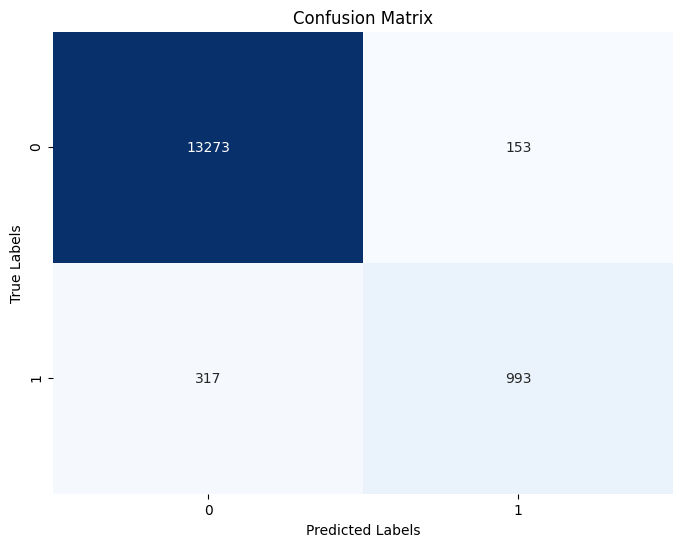

In [10]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test),axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test),axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
14731,1,0
14732,1,0
14733,1,0
14734,1,0


# eraly stopping

In [13]:
import tensorflow as tf
# Reshape the data to match the LSTM input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model.add(Dense(64, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),callbacks=[callback])



Epoch 1/100
1843/1843 [==============================] - 13s 7ms/step - loss: 0.2695 - accuracy: 0.9113 - val_loss: 0.2507 - val_accuracy: 0.9119
Epoch 2/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.2119 - accuracy: 0.9239 - val_loss: 0.2226 - val_accuracy: 0.9227
Epoch 3/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1714 - accuracy: 0.9371 - val_loss: 0.1559 - val_accuracy: 0.9417
Epoch 4/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.1361 - accuracy: 0.9486 - val_loss: 0.1364 - val_accuracy: 0.9473
Epoch 5/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1185 - accuracy: 0.9560 - val_loss: 0.1202 - val_accuracy: 0.9542
Epoch 6/100
1843/1843 [==============================] - 12s 6ms/step - loss: 0.1075 - accuracy: 0.9598 - val_loss: 0.1219 - val_accuracy: 0.9503
Epoch 7/100
1843/1843 [==============================] - 12s 7ms/step - loss: 0.0999 - accuracy: 0.9623 - val_loss: 0.1115 -

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

461/461 - 1s - loss: 0.1011 - accuracy: 0.9713 - 1s/epoch - 3ms/step
Test Accuracy: 97.13%


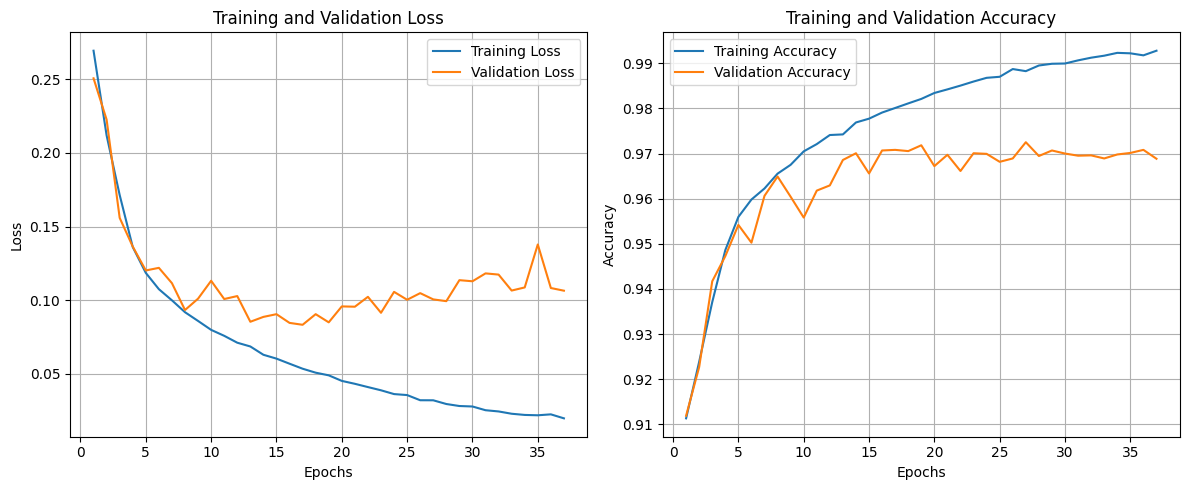

In [15]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




461/461 [==============================] - 1s 2ms/step
Test f1_score : 83.26%


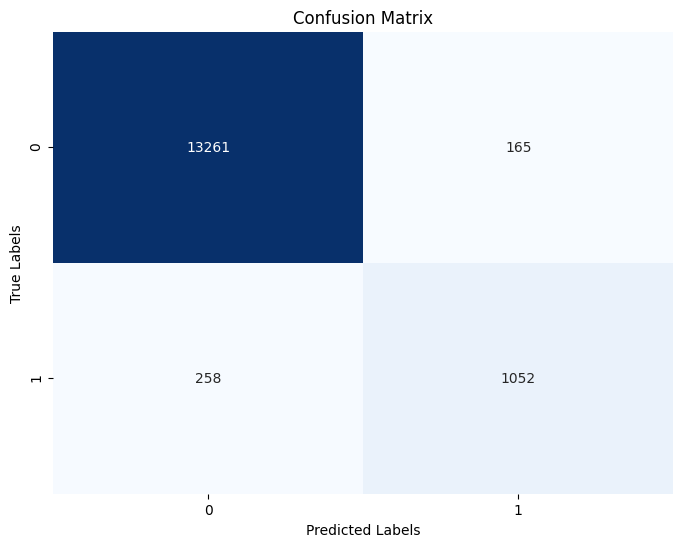

In [16]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
